In [58]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline

In [61]:
## NOT USED DON"T RUN

df = pd.read_csv("widedf.csv",
                dtype={'npi':object,
                       'gender':object,
                       'state':object,
                       'provider_type':object,
                       'EXCLTYPE':object,
                       'year':object})

In [11]:
df.shape

(648778, 128)

In [5]:
df.columns.tolist()

['npi',
 'Net_allow_pay_66984',
 'Net_allow_pay_99213',
 'Net_allow_pay_99214',
 'Net_allow_pay_99223',
 'Net_allow_pay_99232',
 'Net_allow_pay_99233',
 'Net_allow_pay_99284',
 'Net_allow_pay_99285',
 'Net_allow_pay_99291',
 'Net_allow_pay_A0427',
 'Net_submit_pay_66984',
 'Net_submit_pay_99213',
 'Net_submit_pay_99214',
 'Net_submit_pay_99223',
 'Net_submit_pay_99232',
 'Net_submit_pay_99233',
 'Net_submit_pay_99284',
 'Net_submit_pay_99285',
 'Net_submit_pay_99291',
 'Net_submit_pay_A0427',
 'Total_Medicare_allowed_amt_66984',
 'Total_Medicare_allowed_amt_99213',
 'Total_Medicare_allowed_amt_99214',
 'Total_Medicare_allowed_amt_99223',
 'Total_Medicare_allowed_amt_99232',
 'Total_Medicare_allowed_amt_99233',
 'Total_Medicare_allowed_amt_99284',
 'Total_Medicare_allowed_amt_99285',
 'Total_Medicare_allowed_amt_99291',
 'Total_Medicare_allowed_amt_A0427',
 'Total_Medicare_std_payment_amt_66984',
 'Total_Medicare_std_payment_amt_99213',
 'Total_Medicare_std_payment_amt_99214',
 'Total_M

In [12]:
df.Target.value_counts()

0    648637
1       141
Name: Target, dtype: int64

In [13]:
df.columns[df.isnull().any()].tolist()

[]

In [14]:
len(df.index) - df.count()

npi                                 0
Net_allow_pay_66984                 0
Net_allow_pay_99213                 0
Net_allow_pay_99214                 0
Net_allow_pay_99223                 0
Net_allow_pay_99232                 0
Net_allow_pay_99233                 0
Net_allow_pay_99284                 0
Net_allow_pay_99285                 0
Net_allow_pay_99291                 0
Net_allow_pay_A0427                 0
Net_submit_pay_66984                0
Net_submit_pay_99213                0
Net_submit_pay_99214                0
Net_submit_pay_99223                0
Net_submit_pay_99232                0
Net_submit_pay_99233                0
Net_submit_pay_99284                0
Net_submit_pay_99285                0
Net_submit_pay_99291                0
Net_submit_pay_A0427                0
Total_Medicare_allowed_amt_66984    0
Total_Medicare_allowed_amt_99213    0
Total_Medicare_allowed_amt_99214    0
Total_Medicare_allowed_amt_99223    0
Total_Medicare_allowed_amt_99232    0
Total_Medica

In [16]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",5000)

In [17]:
df.provider_type.value_counts()

Internal Medicine                                   90069
Nurse Practitioner                                  84839
Family Practice                                     75764
Physician Assistant                                 55717
Emergency Medicine                                  42147
Orthopedic Surgery                                  20020
Cardiology                                          19159
Optometry                                           18338
Psychiatry                                          18325
Obstetrics & Gynecology                             17924
General Surgery                                     17009
Ophthalmology                                       13497
Podiatry                                            13040
Neurology                                           12868
Gastroenterology                                    12563
Dermatology                                         11045
Pulmonary Disease                                    9609
Urology       

In [18]:
df.provider_type.unique().tolist()

['Internal Medicine',
 'Anesthesiology',
 'Family Practice',
 'Obstetrics & Gynecology',
 'General Surgery',
 'Urology',
 'Physician Assistant',
 'Dermatology',
 'Physical Medicine and Rehabilitation',
 'Radiation Oncology',
 'Infectious Disease',
 'Orthopedic Surgery',
 'Endocrinology',
 'Psychiatry',
 'Rheumatology',
 'General Practice',
 'Neurology',
 'Emergency Medicine',
 'Nephrology',
 'Nurse Practitioner',
 'Pulmonary Disease',
 'Otolaryngology',
 'Plastic and Reconstructive Surgery',
 'Cardiology',
 'Ophthalmology',
 'Interventional Cardiology',
 'Gastroenterology',
 'Hospitalist',
 'Geriatric Medicine',
 'Neurosurgery',
 'Critical Care (Intensivists)',
 'Podiatry',
 'Optometry',
 'Hematology-Oncology',
 'Medical Oncology',
 'Thoracic Surgery',
 'Allergy/ Immunology',
 'Pain Management',
 'Sports Medicine',
 'Diagnostic Radiology',
 'Hand Surgery',
 'Hospice and Palliative Care',
 'Advanced Heart Failure and Transplant Cardiology',
 'Osteopathic Manipulative Medicine',
 'Vascul

# Try and run a cluster analysis

In [62]:
df1 = pd.read_csv("recodedf.csv",
                dtype={'npi':object,
                       'gender':object,
                       'state':object,
                       'northeast':object,
                       'west':object,
                       'south':object,
                       'midwest':object,
                       'basic':object,
                       'specialist':object,
                       'sup_special':object,
                       'provider_type':object,
                       'EXCLTYPE':object,
                       'year':object})

In [63]:
df1.shape

(648778, 215)

In [64]:
df1.dtypes

npi                                      object
Net_allow_pay_66984                     float64
Net_allow_pay_99213                     float64
Net_allow_pay_99214                     float64
Net_allow_pay_99223                     float64
Net_allow_pay_99232                     float64
Net_allow_pay_99233                     float64
Net_allow_pay_99284                     float64
Net_allow_pay_99285                     float64
Net_allow_pay_99291                     float64
Net_allow_pay_A0427                     float64
Net_submit_pay_66984                    float64
Net_submit_pay_99213                    float64
Net_submit_pay_99214                    float64
Net_submit_pay_99223                    float64
Net_submit_pay_99232                    float64
Net_submit_pay_99233                    float64
Net_submit_pay_99284                    float64
Net_submit_pay_99285                    float64
Net_submit_pay_99291                    float64
Net_submit_pay_A0427                    

In [22]:
from PlottingFunctions import plot_inertia, plot_silhouette

In [65]:
df1.columns.tolist()

['npi',
 'Net_allow_pay_66984',
 'Net_allow_pay_99213',
 'Net_allow_pay_99214',
 'Net_allow_pay_99223',
 'Net_allow_pay_99232',
 'Net_allow_pay_99233',
 'Net_allow_pay_99284',
 'Net_allow_pay_99285',
 'Net_allow_pay_99291',
 'Net_allow_pay_A0427',
 'Net_submit_pay_66984',
 'Net_submit_pay_99213',
 'Net_submit_pay_99214',
 'Net_submit_pay_99223',
 'Net_submit_pay_99232',
 'Net_submit_pay_99233',
 'Net_submit_pay_99284',
 'Net_submit_pay_99285',
 'Net_submit_pay_99291',
 'Net_submit_pay_A0427',
 'Total_Medicare_allowed_amt_66984',
 'Total_Medicare_allowed_amt_99213',
 'Total_Medicare_allowed_amt_99214',
 'Total_Medicare_allowed_amt_99223',
 'Total_Medicare_allowed_amt_99232',
 'Total_Medicare_allowed_amt_99233',
 'Total_Medicare_allowed_amt_99284',
 'Total_Medicare_allowed_amt_99285',
 'Total_Medicare_allowed_amt_99291',
 'Total_Medicare_allowed_amt_A0427',
 'Total_Medicare_std_payment_amt_66984',
 'Total_Medicare_std_payment_amt_99213',
 'Total_Medicare_std_payment_amt_99214',
 'Total_M

In [66]:
df1['sex'] = df1.gender.map(lambda t:0 if t=='M' else 1)

In [67]:
df1['ne'] = df1.northeast.astype(int)

In [68]:
df1['mw'] = df1.midwest.astype(int)
df1['so'] = df1.south.astype(int)
df1['we'] = df1.west.astype(int)
df1['pcp'] = df1.basic.astype(int)
df1['spc'] = df1.specialist.astype(int)
df1['supspc'] = df1.sup_special.astype(int)

In [69]:
dfclus = df1.filter(items=['LPS_66984','LPS_99213','LPS_99214','LPS_99223','LPS_99232','LPS_99233','LPS_99284',
                           'LPS_99285','LPS_99291','LPS_A0427','bene_unique_cnt_66984','bene_unique_cnt_99213',
                           'bene_unique_cnt_99214','bene_unique_cnt_99223','bene_unique_cnt_99232',
                           'bene_unique_cnt_99233','bene_unique_cnt_99284','bene_unique_cnt_99285',
                           'bene_unique_cnt_99291','bene_unique_cnt_A0427','ne','mw',
                           'so','we','pcp','spc','supspc'
                          ])

In [70]:
dfclus.shape

(648778, 27)

In [71]:
dfclus.dtypes

LPS_66984                float64
LPS_99213                float64
LPS_99214                float64
LPS_99223                float64
LPS_99232                float64
LPS_99233                float64
LPS_99284                float64
LPS_99285                float64
LPS_99291                float64
LPS_A0427                float64
bene_unique_cnt_66984    float64
bene_unique_cnt_99213    float64
bene_unique_cnt_99214    float64
bene_unique_cnt_99223      int64
bene_unique_cnt_99232    float64
bene_unique_cnt_99233    float64
bene_unique_cnt_99284      int64
bene_unique_cnt_99285      int64
bene_unique_cnt_99291    float64
bene_unique_cnt_A0427      int64
ne                         int32
mw                         int32
so                         int32
we                         int32
pcp                        int32
spc                        int32
supspc                     int32
dtype: object

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
dfclus[['LPS_66984','LPS_99213','LPS_99214','LPS_99223','LPS_99232','LPS_99233','LPS_99284',
                           'LPS_99285','LPS_99291','LPS_A0427','bene_unique_cnt_66984','bene_unique_cnt_99213',
                           'bene_unique_cnt_99214','bene_unique_cnt_99223','bene_unique_cnt_99232',
                           'bene_unique_cnt_99233','bene_unique_cnt_99284','bene_unique_cnt_99285',
                           'bene_unique_cnt_99291','bene_unique_cnt_A0427','ne','mw',
                           'so','we','pcp','spc','supspc']] = scaler.fit_transform(dfclus[['LPS_66984','LPS_99213','LPS_99214','LPS_99223','LPS_99232','LPS_99233','LPS_99284',
                           'LPS_99285','LPS_99291','LPS_A0427','bene_unique_cnt_66984','bene_unique_cnt_99213',
                           'bene_unique_cnt_99214','bene_unique_cnt_99223','bene_unique_cnt_99232',
                           'bene_unique_cnt_99233','bene_unique_cnt_99284','bene_unique_cnt_99285',
                           'bene_unique_cnt_99291','bene_unique_cnt_A0427','ne','mw',
                           'so','we','pcp','spc','supspc']])


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [80]:
type(dfclus)

pandas.core.frame.DataFrame

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [50]:
## PRELIMINARY RUN: NOT USED RIGHT NOW

kmeans.set_params(n_clusters=5)
kmeans.fit(dfclus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.cluster_centers_

array([[-1.40305324e-01,  9.03510558e-02,  1.02658390e-01,
        -3.06786543e-01, -2.41198137e-01, -3.18996854e-01,
        -2.10744505e-01, -2.31560113e-01, -2.53295303e-01,
        -2.44223958e-03, -9.28007963e-02, -3.90148572e-02,
        -1.94187214e-02, -2.57927806e-01, -2.58628277e-01,
        -2.63901691e-01, -2.21364467e-01, -2.19165376e-01,
        -2.08700721e-01, -1.89069152e-03,  2.83803505e-01,
         3.23734414e-01, -7.50890629e-01, -7.50890629e-01,
         4.77917374e-01, -5.34818281e-01, -1.83764207e-04],
       [ 5.64781146e-01,  3.87484684e-01,  9.76959754e-02,
        -2.84695475e-01, -2.05426642e-01, -3.17675818e-01,
        -2.72022025e-01, -2.68805332e-01, -2.34182082e-01,
        -2.44223958e-03,  3.73527230e-01,  2.92941817e-01,
        -2.64092639e-02, -2.60849061e-01, -2.46274875e-01,
        -2.69061966e-01, -2.45300298e-01, -2.29373909e-01,
        -1.78936486e-01, -1.89069152e-03,  5.60831214e-02,
        -1.69037136e-02, -5.19606840e-02, -5.19606840e-

In [54]:
kmeans.labels_

array([3, 1, 3, ..., 4, 1, 3])

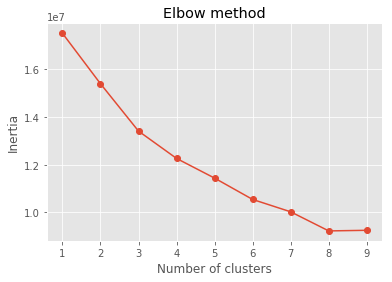

In [57]:
plot_inertia(kmeans, dfclus, range(1, 10))

In [77]:
kmeans.set_params(n_clusters=8)
                
kmeans.fit(dfclus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
plot_silhouette(kmeans, dfclus)

In [ ]:
## LISTING OF VARIABLES ONLY. NOT TO BE RUN.
# 'gender','state','provider_type','EXCLTYPE','year','Target','weight',
# 'LPS_66984','LPS_99213','LPS_99214','LPS_99223','LPS_99232','LPS_99233','LPS_99284','LPS_99285','LPS_99291','LPS_A0427',
#  'northeast','midwest','south','west','basic','specialist','sup_special'
    
# 'bene_unique_cnt_66984','bene_unique_cnt_99213','bene_unique_cnt_99214','bene_unique_cnt_99223',
# 'bene_unique_cnt_99232','bene_unique_cnt_99233','bene_unique_cnt_99284','bene_unique_cnt_99285',
# 'bene_unique_cnt_99291','bene_unique_cnt_A0427',   

In [33]:
#df_wide.reset_index()

In [44]:
## A different way of getting a wide dataset with the column names as string instead of multi-index table

# df['nap_hcpcs']  = 'Net_allow_pay_' + df.hcpcs_code.astype(str)
# df['tmaa_hcpcs'] = 'Total_Medicare_allowed_amt_'     + df.hcpcs_code.astype(str)
# df['tmspa_hcpcs'] = 'Total_Medicare_std_payment_amt_' + df.hcpcs_code.astype(str)
# df['tn_hcpcs']   = 'Total_Net_'                      + df.hcpcs_code.astype(str)
# df['tsca_hcpcs'] = 'Total_submitted_chrg_amt_'       + df.hcpcs_code.astype(str)
# df['amaa_hcpcs'] = 'average_Medicare_allowed_amt_'   + df.hcpcs_code.astype(str)
# df['amsa_hcpcs'] = 'average_Medicare_standard_amt_'  + df.hcpcs_code.astype(str)
# df['asca_hcpcs'] = 'average_submitted_chrg_amt_'     + df.hcpcs_code.astype(str)
# df['buc_hcpcs']  = 'bene_unique_cnt_'                + df.hcpcs_code.astype(str)
# df['lsc_hcpcs']  = 'line_srvc_cnt_'                  + df.hcpcs_code.astype(str)
# df['rpa_hcpcs']  = 'ratio_pay/allowed_'              + df.hcpcs_code.astype(str)
# df['rps_hcpcs']  = 'ratio_pay/submit_'               + df.hcpcs_code.astype(str)

In [45]:
## Making table wide continued

# nap = df.pivot_table(index='npi',columns='nap_hcpcs',values='Net_allow_pay')
# tmaa = df.pivot_table(index='npi',columns='tmaa_hcpcs',values='Total_Medicare_allowed_amt')
# tmspa = df.pivot_table(index='npi',columns='tmspa_hcpcs',values='Total_Medicare_std_payment_amt')
# tn = df.pivot_table(index='npi',columns='tn_hcpcs',values='Total_Net')
# tsca = df.pivot_table(index='npi',columns='tsca_hcpcs',values='Total_submitted_chrg_amt')
# amaa = df.pivot_table(index='npi',columns='amaa_hcpcs',values='average_Medicare_allowed_amt')
# amsa = df.pivot_table(index='npi',columns='amsa_hcpcs',values='average_Medicare_standard_amt')
# asca = df.pivot_table(index='npi',columns='asca_hcpcs',values='average_submitted_chrg_amt')
# buc = df.pivot_table(index='npi',columns='buc_hcpcs',values='bene_unique_cnt')
# lsc = df.pivot_table(index='npi',columns='lsc_hcpcs',values='line_srvc_cnt')
# rpa = df.pivot_table(index='npi',columns='rpa_hcpcs',values='ratio_pay/allowed')
# rps = df.pivot_table(index='npi',columns='rps_hcpcs',values='ratio_pay/submit')

In [46]:
#df_wide = pd.concat([nap,tmaa,tmspa,tn,tsca,amaa,amsa,asca,buc,lsc,rpa,rps ],axis=1)